# Анализ данных в Python

# Корреляция

*Автор: Марина Пак*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Корреляция — это мера **линейной** взаимосвязи между двумя величинами.<br>Сила корреляции (взаимосвязи) выражается числом, которое называется **коэффициентом корреляции**, который:
- измеряется от **-1** до **1**. Чем **ближе** коэффициент по **модулю к 1**, тем корреляция сильнее - линейная взаимосвязь между переменными выше
- положительный коэффициент корреляции - зависимость прямая
- отрицательный коэффициент корреляции - зависимость обратная

**Коэффициент корреляции Пирсона (r)** позволяет оценить силу и направление линейной взаимосвязи  <br><br>
$$
    r = \frac{\sum{(x-M_x)(y-M_y)}}{\sqrt{\sum{(x-M_x)^2}\sum{(y-M_y)^2}}} = \frac{cov{x, y}}{\sigma_x * \sigma_y}
$$<br>Ниже рассмотрим пример расчета коэффициента корреляции несколькими способами. 

In [2]:
df = pd.DataFrame(
    data = [
        [2, 4, 1, 3, 5],
        [6, 8, 1, 7, 3]
    ],
    index = ['x', 'y']
).T

df['x - mu_x'] = df['x'] - df['x'].mean()
df['y - mu_y'] = df['y'] - df['y'].mean()

numerator = (df['x - mu_x'] * df['y - mu_y']).sum()

denominator = np.sqrt((df['x - mu_x'] ** 2).sum() * (df['y - mu_y'] ** 2).sum())

r = round(numerator / denominator, 2) # округлим до двух знаков после запятой

print(f'Коэффициент корреляции (r) = {numerator} / {round(denominator, 2)} = {r}')

Коэффициент корреляции (r) = 6.0 / 18.44 = 0.33


In [3]:
df

,x,y,x - mu_x,y - mu_y
0,2,6,-1.0,1.0
1,4,8,1.0,3.0
2,1,1,-2.0,-4.0
3,3,7,0.0,2.0
4,5,3,2.0,-2.0


Выше мы рассчитали коэффициент корреляции между двумя переменными. Альтернативные способы расчета представлены ниже. Они оба возвращают корреляционную матрицу. Заметьте, что на пересечении (x и y) и (y и x) - значение коэффициента корреляции всегда одинаково.

In [4]:
# альтернативный способ 1 (полезен, когда переменных много)

df[['x', 'y']].corr().round(2)

,x,y
x,1.00,0.33
y,0.33,1.00


In [5]:
# справочно: если нас интересует только один коэффициент корреляции, а не целая матрица, то можно использовать следующую команду

df['x'].corr(df['y'])

0.32539568672798425

In [6]:
# альтернативный способ 2 (интересует побочная диагональ матрицы)

np.corrcoef(df['x'], df['y'])

array([[1.        , 0.32539569],
       [0.32539569, 1.        ]])

**ВАЖНО!** 
1. Корреляция **не подразумевает причинно-следственной связи**. Если между признаками А и Б есть тесная взаимосвязь, то мы **НЕ** можем говорить, что А влияет на Б или Б влияет на А.
2. Корреляция **чувствительны к выбросам**.* Пример ниже.
3. Коэффициент корреляции Пирсона **не фиксирует нелинейные отношения** между двумя переменными. Пример ниже.

Пример чувствительности коэффициента корреляции к выбросам в данных:

Корреляция между X и Y (исходные данные) = -0.62


''

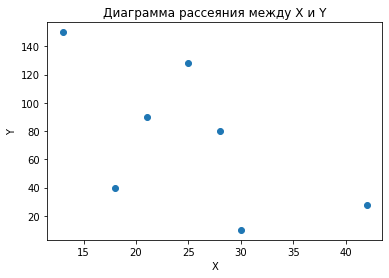

In [7]:
# исходные данные

X = np.array([13, 21, 30, 42, 18, 25, 28])
Y = np.array([150, 90, 10, 28, 40, 128, 80])
print('Корреляция между X и Y (исходные данные) = {}'.format(round(np.corrcoef(X, Y)[1, 0], 2)))
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния между X и Y')
;

Корреляция после добавления экстремального наблюдения = 0.8


''

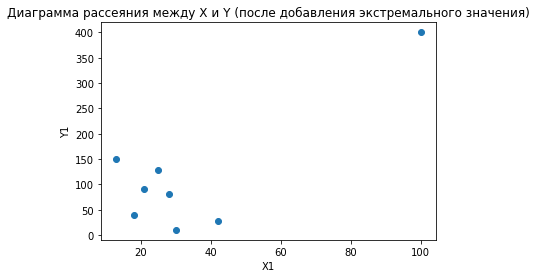

In [8]:
# данные после добавления экстремальных значений

X1 = np.array([13, 21, 30, 42, 18, 25, 28, 100])
Y1 = np.array([150, 90, 10, 28, 40, 128, 80, 400])
print('Корреляция после добавления экстремального наблюдения = {}'.format(round(np.corrcoef(X1, Y1)[1, 0], 2)))
plt.scatter(X1, Y1)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Диаграмма рассеяния между X и Y (после добавления экстремального значения)')
;

Пример нелинейной связи

Корреляция при нелинейной связи = 0.0


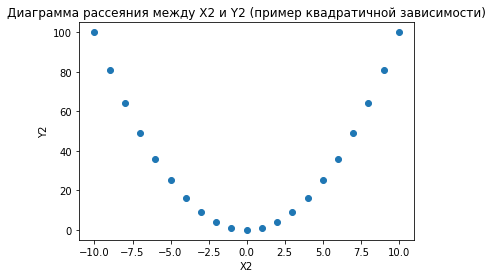

In [9]:
X2 = np.linspace(-10, 10, 21) # от -10 до 10 создается 21 значение
Y2 = X2 ** 2 # задаем квадратичную зависимость
print('Корреляция при нелинейной связи = {}'.format(round(np.corrcoef(X2, Y2)[1, 0], 2)))
plt.scatter(X2, Y2)
plt.xlabel('X2')
plt.ylabel('Y2')
plt.title('Диаграмма рассеяния между X2 и Y2 (пример квадратичной зависимости)');

Мы точно знаем, как связаны X2 и Y2, но при этом коэффициент корреляции Пирсона = 0, т.к. он отслеживает именно **линейную** зависимость.

**Где и как можно использовать корреляцию на практике**:
- на основе корреляции можно делать базовые предпосылки к прогнозированию (более корректно - модели, например, регрессионные)
- корреляцию можно использовать для оценки валидности разных тестов. Например, если психолог разработал тест для определения уровня тревоги, то его результаты должны показывать сильную корреляцию с другими показателями, которые точно идентифицируют тревожность (например, физиологические индикаторы).
- с помощью корреляции можно определить надежность оценочных инструментов. Например, предположим, группа людей сдает экзамен два раза через небольшие промежутки времени. Результаты первой попытки и второй попытки должны быть практически одинаковые, если экзамен действительно хорошо составлен и условия проведения не изменились. Иными словами, если корреляция между результатами сильная, то можно говорить о надежности инструмента.



После того, как мы научились рассчитывать линейную взаимосвязь с помощью корреляции, следующим шагом попробуем описать линейную взаимосвязь в виде уравнения - линейной функции вида:
$$
y = a + b * x
$$

Вспомните, что при нулевом значении *x*, значение *y* равно коэффициенту *a*

Для расчета коэффициентов парной регрессии вам потребуются формулы:
$$
    b = \frac{\sum{(x-M_x)(y-M_y)}}{\sum{(x-M_x)^2}}
$$<br>
$$
    a = M_y - b * M_x
$$

Чуть подробнее о коэффициенте b и корреляции см. в конце семинара.

Рассмотрим реальные данные по рынку недвижимости.

Данные за февраль 2023 г.

Подробнее на Домклик: https://opendata.domclick.ru/

In [11]:
data = pd.read_excel('Домклик данные за февраль 2023.xlsx', sheet_name = 'итог очищенный')

# ссылка на данные https://github.com/aaparshina/22-23_Intro-to-DS/blob/main/DATA/Домклик%20данные%20за%20февраль%202023.xlsx

**Задание с ***. Попробуйте реализовать какой-либо способ заполнения пропусков в данных. Например, средним значением по федеральному округу.

In [12]:
data.shape, data.dropna().shape # ниже мы удалим пропуски в данных

((83, 25), (68, 25))

In [13]:
data.dropna(inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 71
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Рейтинг регионов по количеству объявлений о продаже             68 non-null     int64  
 1   Изменение рейтинга регионов по количеству объявлений о продаже  68 non-null     int64  
 2   Регион                                                          68 non-null     object 
 3   Активных объявлений о продаже                                   68 non-null     int64  
 4   Активных объявлений, вторичка                                   68 non-null     int64  
 5   Активных объявлений, новостройки                                68 non-null     float64
 6   Средняя стоимость м², вторичка                                  68 non-null     int64  
 7   Средняя стоимость м², новостройки                      

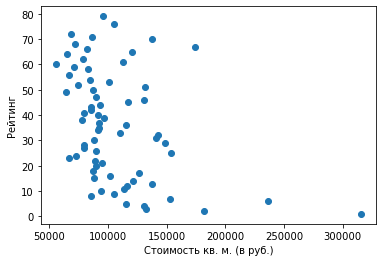

In [15]:
# например

plt.scatter(data['Средняя стоимость м², новостройки'], data['Рейтинг по количеству ипотечных сделок'])
plt.xlabel('Стоимость кв. м. (в руб.)')
plt.ylabel('Рейтинг');

Попробуем объяснить с помощью линейной функции рейтинг по количеству ипотечных сделок в зависимости от средней стоимости квадратного метра в новостройках по регионам России в феврале 2023.

Тогда y - это рейтинг, а x - стоимость

In [16]:
# создадим таблицу с данными для удобства расчетов
df = pd.DataFrame(
    data = {
        'Y': data['Рейтинг по количеству ипотечных сделок'], # чем ниже рейтинг, тем больше ипотечных сделок
        'X': data['Средняя стоимость м², новостройки'] / 10_000 # разделим на 10 000 рублей
    }
)

In [17]:
df.head()

,Y,X
0,3,13.2270
1,2,18.1756
2,1,31.5195
3,6,23.6205
4,9,10.5500


In [18]:
# посчитаем коэффициенты a и b

df['mu_x'] = df['X'].mean()
df['mu_y'] = df['Y'].mean()
df['X - mu_x'] = df['X'] - df['mu_x']
df['Y - mu_y'] = df['Y'] - df['mu_y']
df['squared(X - mu_x)'] = df['X - mu_x'] ** 2
df['(X - mu_x) * (Y - mu_y)'] = df['X - mu_x'] * df['Y - mu_y']

In [19]:
df.head()

,Y,X,mu_x,mu_y,X - mu_x,Y - mu_y,squared(X - mu_x),(X - mu_x) * (Y - mu_y)
0,3,13.2270,10.670525,36.352941,2.556475,-33.352941,6.535564,-85.265960
1,2,18.1756,10.670525,36.352941,7.505075,-34.352941,56.326151,-257.821400
2,1,31.5195,10.670525,36.352941,20.848975,-35.352941,434.679759,-737.072587
3,6,23.6205,10.670525,36.352941,12.949975,-30.352941,167.701853,-393.069829
4,9,10.5500,10.670525,36.352941,-0.120525,-27.352941,0.014526,3.296713


In [20]:
b = df['(X - mu_x) * (Y - mu_y)'].sum() / df['squared(X - mu_x)'].sum()
print('Коэффициент b (чувствительность рейтинга к стоимости квадратного метра новостройки) = ', round(b, 3))

Коэффициент b (чувствительность рейтинга к стоимости квадратного метра новостройки) =  -2.129


Это означает, что с увеличением стоимости квадратного метра новостройки на 10 000 рублей, рейтинг региона в среднем будет снижаться на 2.129 единиц (т.е. число ипотечных сделок будет расти)

In [21]:
a = df['mu_y'][0] - df['mu_x'][0] * b
print('Коэффициент a (пересечение искомой линии, описывающей взаимосвязь X и Y, с осью OY) = ', round(a, 3))

Коэффициент a (пересечение искомой линии, описывающей взаимосвязь X и Y, с осью OY) =  59.074


In [22]:
# добавим ряд прогнозов, полученных после расчета коэффициентов парной регрессии

df['Y прогноз'] = a + df['X'] * b

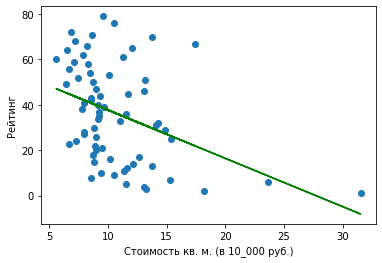

In [23]:
# например

plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], df['Y прогноз'], color = 'green')
plt.xlabel('Стоимость кв. м. (в 10_000 руб.)')
plt.ylabel('Рейтинг');

**Упражнение**

1. Попробуйте убрать регионы с высокой стоимостью квадратного метра (например, выше 200 000 руб.) и повторите расчет. 
- какие регионы были убраны?
- как изменились коэффициенты?

2. Попробуйте самостоятельно выбрать пару других показателей, построить линейную зависимость (парную регрессию) и проинтерпретировать результат. Сходится ли он с вашими ожиданиями?

**Примечание**

Ранее было сказано, что 
$$
    b = \frac{\sum{(x-M_x)(y-M_y)}}{\sum{(x-M_x)^2}}
$$<br>это фактически означает:
$$
    b = \frac{cov{x, y}}{Var(x)} = \rho * \sqrt{\frac{Var(y)}{Var(x)}} 
$$<br>

Для парной регрессии знак корреляции совпадает со знаком коэффициента b, но значения этих величин (*b* и $\rho$) равны между собой лишь в случае $ Var(y) = Var(x) $

In [24]:
cov_matrix_x_y = df[['X', 'Y']].cov()
covariance_x_y = cov_matrix_x_y.loc['Y', 'X']
var_x = cov_matrix_x_y.loc['X', 'X']
var_y = cov_matrix_x_y.loc['Y', 'Y']
corr_x_y = df[['Y', 'X']].corr().loc['X', 'Y']

b_check1 = covariance_x_y / var_x

b_check2 = corr_x_y * np.sqrt(var_y / var_x)

print(round(b, 3), round(b_check1, 3), round(b_check2, 3))

-2.129 -2.129 -2.129
